# DIABETES PREDICTION SYSTEM

## INTRODUCTION

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases provided by MeriSkill for internship practice. Several constraints were placed on the selection of the instances drawn from a larger database. In particular, all patients in the dataset are females, at least 21 years old of Pima Indian heritage.

### Objectives of the study

- To diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset.

## META DATA

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration (glucose tolerance test)
- Blood Pressure: Diastolic blood pressure (mm Hg)
- Skin Thickness: Skinfold thickness (mm)
- Insulin: 2-Hr serum insulin (mu U/ml)
- BMI: Body mass index (weight in Kg/ (height in m)²)
- Diabetes Pedigree Function: Diabetes pedigree function
- Age: Age (years)
- Outcome: Status of Diabetes (The binary dependent variable)

#### "Outcome" category description:
* 0 = Negative 
* 1 = Postive

### Importing our Libraries

In [1]:
#Let's import the relevant Libraries

import pandas as pd #to create our dataframe & wrangle our data
import numpy as np #for the maths
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization
from sklearn.linear_model import LogisticRegression #for building our model since we are dealing with a classification problem
from sklearn.metrics import accuracy_score # our performance metric
from sklearn.model_selection import train_test_split # for our randomised train-test split
from sklearn.metrics import ConfusionMatrixDisplay # for making the confusion matrix
from ipywidgets import FloatSlider, IntSlider, interact # for our interactive dashboard

import warnings
warnings.filterwarnings("ignore")

### Importing our data

In [2]:
#Let's read our data into a pandas Dataframe

df = pd.read_csv("diabetes.csv")

### Exploring Our Data

In [3]:
#Let's see the shape of our data ie rows & columns

print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

df.shape

Number of Rows: 768
Number of Columns: 9


(768, 9)

In [4]:
#Let's look at the columns in our dataframe

df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#Let's have a glimpse of our first five rows

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Let's look at what datatypes our variables have

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Do we have any null values?

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#Do we have any duplicates in our data?

df.duplicated().sum()

0

In [9]:
#Let's see the unique values of each of our variables

df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [10]:
#Let's see the summary statistics of our Numerical variables

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


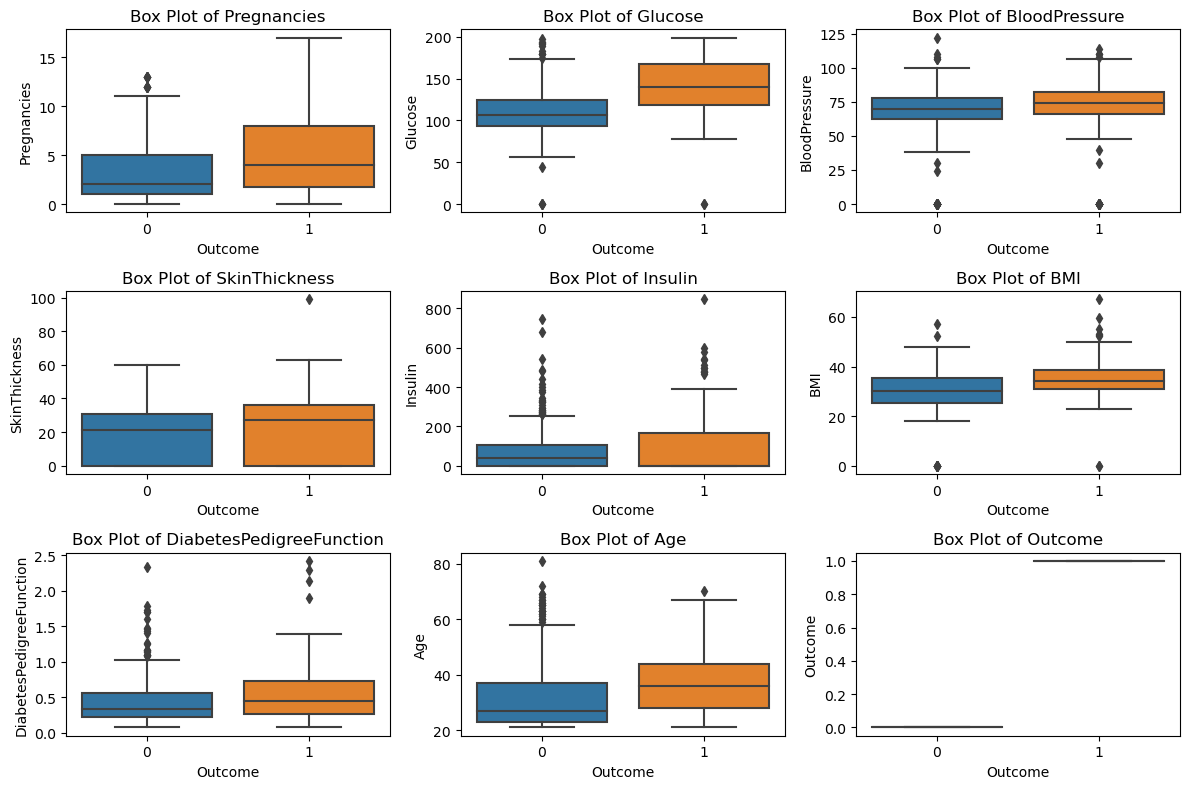

In [11]:
# Do we have Outliers in our dataset?

plt.figure(figsize=(12, 8))
for i, column in enumerate(df):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x="Outcome", y=column, data=df)
    plt.title(f"Box Plot of {column}")
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <b>📝 Note:</b> We can see that we have some outliers in our dataset and must treat them in some way. In this case, i'll keep them and go with a model that is not affected by presence of outliers like a Logistic Regression Model. 
</div>

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


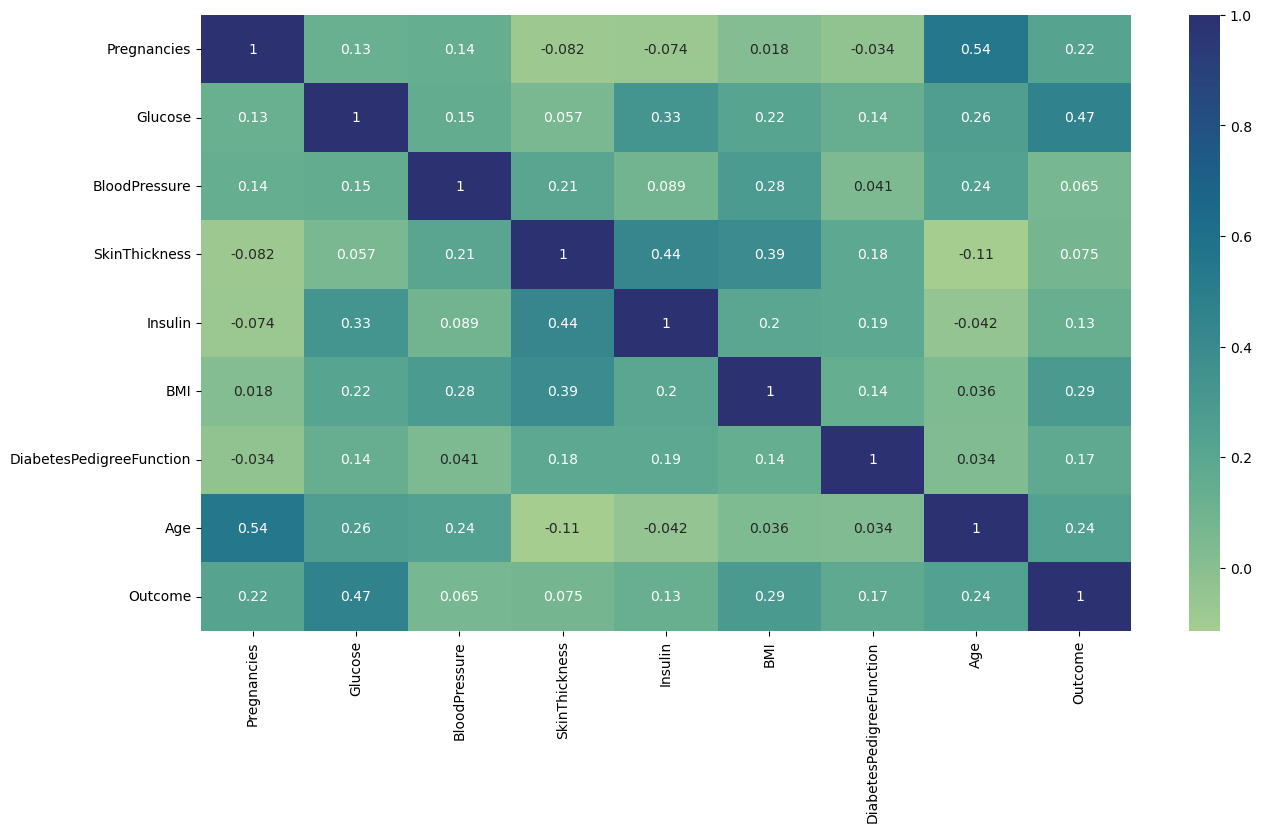

In [12]:
# Checking correlation between our variables using a heatmap

plt.figure(figsize= (15,8))
relationship = df.corr() # returns table with correlation coefficients
sns.heatmap(relationship, cmap = 'crest', annot =True) #plots a visual of these corr coefficients

relationship

### Train-Test Split

A Key part in any model building project is separating your Target 'y'(the thing you want to predict) from your Features 'X'(the information your model will use to make it's predictions). I'm going to perform a randomized Train-Test Split where i randomly choose 80% of my data to be my training set and the remaining 20% the test data.

In [13]:
# Let's create our Feature Matrix 'X' & Target Vector 'y'

target = "Outcome"
X = df.drop(columns = target)
y = df[target]

In [14]:
# let's perform our randomized train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train Shape:" , X_train.shape)
print("y_train Shape:" , y_train.shape)
print("X_test Shape:" , X_test.shape)
print("y_test Shape:" , y_test.shape)

X_train Shape: (614, 8)
y_train Shape: (614,)
X_test Shape: (154, 8)
y_test Shape: (154,)


<div class="alert alert-block alert-success">
    <b>Hooray!!🎉🎉:</b> We can see that both our X_train and X_test have the same column order. You want them to have the same order because if they don't, it may hurt model's performance.
</div>

### Building Model
Since we are dealing with a classification problem with a binary outcome, our best bet at a model is a Logistic Regression model.
Also Since we are dealing with discrete/categorical data we shall use Accuracy Score as our performance metric for creating a Baseline. 
<div class="alert alert-block alert-info">
    <b>📝Note:[Accuracy is equal to the number of observations you correctly classified over all observations]</b>
</div>

There are 3 steps to building a Model;
1. Instatiate the Model (Creating/build a model that we can train)
2. Train that Model (Fit our model)
3. Evaluate Model (Make predictions)

In [15]:
# let's create our baseline that we have to beat

accuracy_baseline = y_train.value_counts(normalize = True).max()

print("Baseline Accuracy:", round(accuracy_baseline, 2))

Baseline Accuracy: 0.65


In [16]:
# Let's instantiate our model. We shall not be encoding our data since it's already encoded as "0 & 1"

model = LogisticRegression()

In [17]:
# let's Fit our model

model.fit(X_train, y_train)

LogisticRegression()

<div class="alert alert-block alert-success">
    <b>Success:</b> Our Model is fitted 🤗🤗🤗.
</div>

In [18]:
# let's evaluate our model (make some predictions). This can be done with sckit learn using the 2 options below.

accuracy_test = model.score(X_test, y_test)
accuracy_train = accuracy_score(y_train, model.predict(X_train))

print("Test Accuracy:", round(accuracy_test, 2))
print("Training Accuracy:", round(accuracy_train, 2))

Test Accuracy: 0.74
Training Accuracy: 0.77


<div class="alert alert-block alert-success">
    <b>Hooray!!🎉🎉:</b> We beat our baseline using both options.
</div>

### Confusion Matrix
1. How certain are we that our model is performing as it should?

Accuracy Score may not provide enough information to assess how a model is performing because it only gives us an overall score. Also, imbalanced data can lead to a high accuracy score even when a model isn't particularly useful. If we want to know what fraction of all positive predictions were correct and what fraction of positive observations we identified, we can use a Confusion Matrix.

##### A Confusion Matrix is basically a table summarizing the performance of a model by enumerating True and False Positives, and, True and False Negatives.


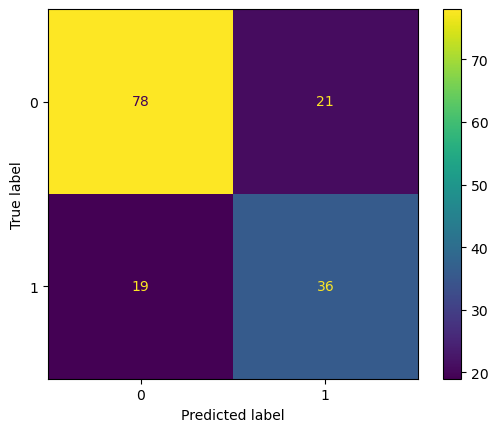

In [19]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

### Communicate Our Results

I will be deploying my model as a Prediction Function & using an interactive Dashboard. But first i will predict Probability of certainity that the model is performing as it should.

#### Deploying as a Prediction Function

In [20]:
# Prediction Function

def make_prediction(Pregnancies, Glucose, 	BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    data = {
        "Pregnancies": Pregnancies,
        "Glucose": Glucose,
        "BloodPressure": BloodPressure,
        "SkinThickness": SkinThickness,
        "Insulin": Insulin,
        "BMI": BMI,
        "DiabetesPedigreeFunction": DiabetesPedigreeFunction, 
        "Age": Age
    }
    
    df = pd.DataFrame(data, index = [0]) # this will make the dataframe in form of a list
    prediction = model.predict(df).round(2) # then we feed it to the model
    return f"Predicted Diabetes Outcome: {prediction}"

In [21]:
#Testing our prediction function using our first entry from our data

make_prediction(6, 148, 72, 35, 0, 33.6, 0.627, 50)

'Predicted Diabetes Outcome: [1]'

#### Deploying as an Interactive Dashboard
let's create an interactive dashboard using Jupyter Widgets, where the user supplies values and recieves a prediction.

In [22]:
interact (
    make_prediction,
    Pregnancies = IntSlider(
        min = X_train ["Pregnancies"].min(),
        max = X_train ["Pregnancies"].max(),
        value = X_train ["Pregnancies"].mean(),
    ),
    Glucose = IntSlider(
        min = X_train ["Glucose"].min(),
        max = X_train ["Glucose"].max(),
        value = X_train ["Glucose"].mean(),
    ),
    BloodPressure = IntSlider(
        min = X_train ["BloodPressure"].min(),
        max = X_train ["BloodPressure"].max(),
        value = X_train ["BloodPressure"].mean(),
    ),
     SkinThickness = IntSlider(
        min = X_train ["SkinThickness"].min(),
        max = X_train ["SkinThickness"].max(),
        value = X_train ["SkinThickness"].mean(),
    ),
     Insulin = IntSlider(
        min = X_train ["Insulin"].min(),
        max = X_train ["Insulin"].max(),
        value = X_train ["Insulin"].mean(),
    ),
     BMI = FloatSlider(
        min = X_train ["BMI"].min(),
        max = X_train ["BMI"].max(),
        value = X_train ["BMI"].mean(),
    ),
    DiabetesPedigreeFunction = FloatSlider(
        min = X_train ["DiabetesPedigreeFunction"].min(),
        max = X_train ["DiabetesPedigreeFunction"].max(),
        value = X_train ["DiabetesPedigreeFunction"].mean(),
    ),
    Age = IntSlider(
        min = X_train ["Age"].min(),
        max = X_train ["Age"].max(),
        value = X_train ["Age"].mean(),
    ),
);

interactive(children=(IntSlider(value=3, description='Pregnancies', max=17), IntSlider(value=120, description=…